# Hey Everyone! Here's my progress in learning Tensorflow and practicing Machine Learning. **Part 2**


**Follow my journey on social media:** [Podcast](https://open.spotify.com/show/6FxUBKO4bqwRWsjAIGZMwz) | [Twitter](https://twitter.com/tlkdata2me) | [Instagram](https://www.instagram.com/tlkdata2me/) | [LinkedIn](https://www.linkedin.com/in/shecananalyze/) 

Learning Source: [Click here to take freeCodeCamp's TensorFlow 2.0 Complete Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

## What I Learned about Neural Networks (Summary)
So I listened to Tim explain Neural Networks and how they work. I will not place detailed notes in the notebook, but I have placed the link to his course above. 

The bases of Neural Networks is:
- Neural Network include
  - Inputs
  - Outputs
  - Hidden Layers
    - Layers are connected by weights
    - There are Biases on each layer
      - Biases are controlled neurons placed in each layer before the output and and allows us to move the network in the needed direction. 
      
Calculating the Network: 
1. Take the weighted sum of each Neuron in the layer by adding together all of the weights that connect the Neurons from the previous layer to the Neuron we need to find the value for.(This is done for each neuron in question)
2. Add the Bias
3. Apply Activation Functions to Biases to move them according to the function and help place neurons in the hidden layers between two values to determine the output. 
  - Activation Function moves the network up in complexity
4. This process is repeated until the last output layer

Training the Network:
1. Make predictions
2. Compare predictions to the expected values calculated in the Loss/Cost functions 
  - The lower the loss function, the better the network
3. Calculate the Gradient
4. Use the back-propigation algorithm to back track through the neural network and adjust weights and biases according to the calculated gradient.

### Optimizer

**Optimizer (optimization function)** - A function that implements the backpropagation algorithm. 

A list of a few common optimizers:

- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

## Creating a Neural Network

In [0]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Here we imported a dataset from Keras which included 60,000 images for training and 10,000 images for validation/testing.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training sets

In [0]:
#Sets are train_images, train_labels, test_images, and test_labels
train_images.shape

(60000, 28, 28)

This shape means
(60000 *images*, 28 *pixels*, 28 *pixels*)

So we've got 60,000 images that are made up of 28x28 pixels (784 pixels in total)

In [0]:
train_images[0,23,23]  # let's have a look at one pixel

194

From the train_images set we are calling: [image number 0, row 23(pixel), column 23(pixel)] 

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [0]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Seeing what the images look like

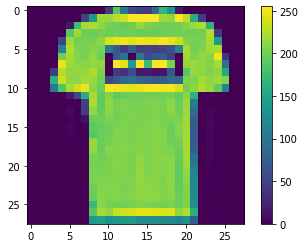

In [0]:
#This block of code will use madplotlib to help you see a grid view of the pixelated image. 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing

The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0
#I will have to practice this step to full understand and get some good practice with it. 

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

*He put pretty great notes here so most of it will be copied from the original doc.*

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Sequential Neural Networks:** Calculate from the left side to the right side of the neural network (in order)

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The ***.Flatten*** means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The ***.Dense*** denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit *'relu'* activation function coded as *(activation = 'relu')*.

**Layer 3:** This is our output later and is also a dense layer. **The number of output neurons (10) should be the same as the number of classes (10).** It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
**The last step in building the model is to define the following**
- optimizer
- loss function 
- metrics we would like to track 

**Hyperparameter:** a parameter whose value is set before the learning process begins. Another way to put it is that they are settings that can be tuned to control the behavior of a machine learning algorithm.

**Hyperparameter Tuning/Optimizations:** Choosing a set of hyperparameters for a learning algorithm

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [0]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4046 - accuracy: 0.8572
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3995 - accuracy: 0.8597
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3946 - accuracy: 0.8619
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3904 - accuracy: 0.8624
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3865 - accuracy: 0.8636


##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.4230 - accuracy: 0.8495
Test accuracy: 0.8495


**Overfitting** is when the accuracy here is lower than when training the model. 

The model is now trained and we can use it to predict values. 

##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [0]:
predictions = model.predict(test_images)
print(predictions[0])

[7.5480807e-07 2.3409090e-08 6.3617581e-06 4.0192153e-06 4.3783807e-06
 2.0156334e-01 1.9379364e-05 1.5867223e-01 3.9893626e-03 6.3574010e-01]


This method returns to us an array of predictions (probability distribution) for each image. Each number represents a class from class_names, the larger number represents the class the model is predicting the array is an image of. 

In [0]:
predictions[0]

array([7.5480807e-07, 2.3409090e-08, 6.3617581e-06, 4.0192153e-06,
       4.3783807e-06, 2.0156334e-01, 1.9379364e-05, 1.5867223e-01,
       3.9893626e-03, 6.3574010e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called **argmax**(). This simply returns the index of the maximium value from a numpy array.


In [0]:
np.argmax(predictions[0]) #The number in the 9th postion(really 10th) of the array is the maximum value

9

In [0]:
print(class_names[np.argmax(predictions[0])]) #The label in the 9th position is the label the model is predicting is correct

Ankle boot


we can check if this is correct by looking at the value of the cooresponding test label.

In [0]:
test_labels[0]

9

Putting it all togther here because I like how it was done in the video. 

The model has guessed: T-shirt/top


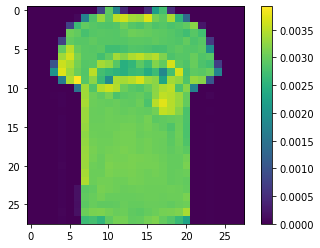

In [0]:
print('The model has guessed: {}'.format(class_names[np.argmax(predictions[19])])) #Enter prediction index
plt.figure()
plt.imshow(test_images[19]) #enter image index
plt.colorbar()
plt.grid(False)
plt.show()
#The model should return what it's prediction of the pixelated image is. 
#The matplotlib portion of the code block will return a graph of the image in question

##Verifying Predictions

The model will have us pick a number, it will then tell us the expected image along with the grid and then tell us what the guess is....pretty much the same as above thing with an input option. Pretty cool!

Pick a number: 8


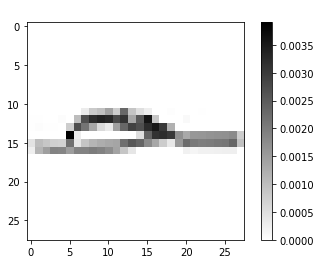

In [0]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
